## General Information
<p><img style="float: right ; margin: 5px 20px 5px 10px; width: 20%" src="images/american-gods.jpeg"> </p>
<p>This notebook is based on Datacamp's Frequencey Counter Notebook and explores what are the most frequent words in Neil Gaiman's novel, American Gods, and how often do they occur?</p>
<p>This notebook: 
    <ul>
        <li>Scrapes the novel <em>American Gods</em> from the website <a href="https://archive.org/">Internet Archive</a> using the Python package <code>requests</code>.</li>
        <li>Extract words from this web data using <code>BeautifulSoup</code>.</li>
        <li>Analyzes the distribution of words using the Natural Language ToolKit (<code>nltk</code>) and <code>Counter</code>.</li>
    </ul>
</p>

In [1]:
# Importing requests, BeautifulSoup, nltk, and Counter
import requests
import nltk
from bs4 import BeautifulSoup
from collections import Counter

# Download stopowords that will be used later
nltk.download('stopwords')

# Getting the American Gods HTML from Internet Archive
r = requests.get("https://archive.org/stream/AmericanGodsNeilGaiman1/American_Gods_-_Neil_Gaiman%20_1__djvu.txt")

# Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

# Extracting the HTML from the request object, html is of type string
html = r.text

# Printing the first 2000 characters in html
html[:2000]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\theo_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'<!DOCTYPE html>\n<html lang="en">\n<!-- __ _ _ _ __| |_ (_)__ _____\n    / _` | \'_/ _| \' \\| |\\ V / -_)\n    \\__,_|_| \\__|_||_|_| \\_/\\___| -->\n  <head data-release=40f8774b>\n    <title>Full text of &quot;American Gods Neil Gaiman 1&quot;</title>\n\n          <meta name="viewport" content="width=device-width, initial-scale=1.0"/>\n    \n        <meta name="google-site-verification" content="Q2YSouphkkgHkFNP7FgAkc4TmBs1Gmag3uGNndb53B8" />\n    <meta name="google-site-verification" content="bpjKvUvsX0lxfmjg19TLblckWkDpnptZEYsBntApxUk" />\n\n    <script>\n/* @licstart  The following is the entire license notice for the\n * JavaScript code in this page.\n *\n * This program is free software: you can redistribute it and/or modify\n * it under the terms of the GNU Affero General Public License as published by\n * the Free Software Foundation, either version 3 of the License, or\n * (at your option) any later version.\n *\n * This program is distributed in the hope that it will be us

## Extract the text from the HTML
<p>Process this HTML to extract the text of the novel using the package <code>BeautifulSoup</code>.</p>

In [2]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, 'html.parser')

# Getting the text out of the soup
text = soup.get_text()

# Find where the text begins
start = text.find("One question that has")

# Find where the text ends
end = text.find("Acknowle dgme nts ")
print("Text of the novel begins at index: {} and ends at index: {}".format(start, end))

novel = text[start:end]

Text of the novel begins at index: 7925 and ends at index: 1043269


<p>To verify, print a section from the beginning and a section from the ending of the novel</p>

In [3]:
beginning = novel[:30]
ending = novel[-30:]

print("BEGINNING: \n{}".format(beginning))
print("ENDING: \n{}".format(ending))

BEGINNING: 
One question that has 
always 
ENDING: 


and he kept on walking. 






## Extract the words
<p>Using <code>nltk</code> – the Natural Language Toolkit, tokenize the text by remove everything that isn't a word (whitespace, punctuation, etc.) and then split the text into a list of words and make them all lowercase.</p>

In [4]:
# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenizing the text
tokens = tokenizer.tokenize(novel)

# Printing out the first 8 words / tokens 
print("First 8 tokens: {}".format(tokens[:8]))

# Create a list called words containing all tokens transformed to lower-case
words = [i.lower() for i in tokens]

# Printing out the first 8 words / tokens 
print("First 8 words: {}".format(words[:8]))

First 8 tokens: ['One', 'question', 'that', 'has', 'always', 'intrigued', 'me', 'is']
First 8 words: ['one', 'question', 'that', 'has', 'always', 'intrigued', 'me', 'is']


## Handling stop words
<p>It is common practice to remove words that appear a lot in the English language such as 'the', 'of' and 'a' because they're not so interesting. Such words are known as <em>stop words</em>. The package <code>nltk</code> includes a good list of stop words in English.</p>

In [5]:
from nltk.corpus import stopwords

# Getting the English stop words from nltk
sw = stopwords.words('english')

# Printing out the first eight stop words
sw[:8]

# Create a list words_prc containing all words that are in words but not in sw
words_prc = [i for i in words if i not in sw]

# Printing the first 8 words_ns to check that stop words are gone
print("First 8 words after removal of stopwords: {}".format(words_prc[:8]))

First 8 words after removal of stopwords: ['one', 'question', 'always', 'intrigued', 'happens', 'demonic', 'beings', 'immigrants']


## Most frequent words:

In [6]:
# Initialize a Counter object from our processed list of words
count = Counter(words_prc)

# Store 10 most common words and their counts as top_ten
top_ten = count.most_common(20)

# Print the top ten words and their counts
top_ten

[('said', 2050),
 ('shadow', 2032),
 ('back', 595),
 ('like', 583),
 ('one', 548),
 ('man', 541),
 ('wednesday', 520),
 ('could', 455),
 ('would', 432),
 ('know', 361),
 ('looked', 335),
 ('old', 326),
 ('hand', 314),
 ('time', 309),
 ('good', 289),
 ('head', 287),
 ('people', 286),
 ('see', 278),
 ('got', 276),
 ('walked', 265)]

### Visualizing the results

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Get the top fifty words
top_fifty = count.most_common(50)

# Initialize empty dictionary
count_dict = {}

# Convert count to dictionary in reverse order to later facilitate the dot plot creation
for entry in top_fifty[::-1]:
    word = entry[0]
    word_count = entry[1]
    count_dict[word] = word_count

In [9]:
# Calculate a lower and upper bound for the dot plot
lower_bound = count_dict[top_fifty[-1][0]]
upper_bound = count_dict[top_fifty[0][0]]

print("Lower bound: {}".format(lower_bound))
print("Upper bound: {}".format(upper_bound))

Lower bound: 192
Upper bound: 2050


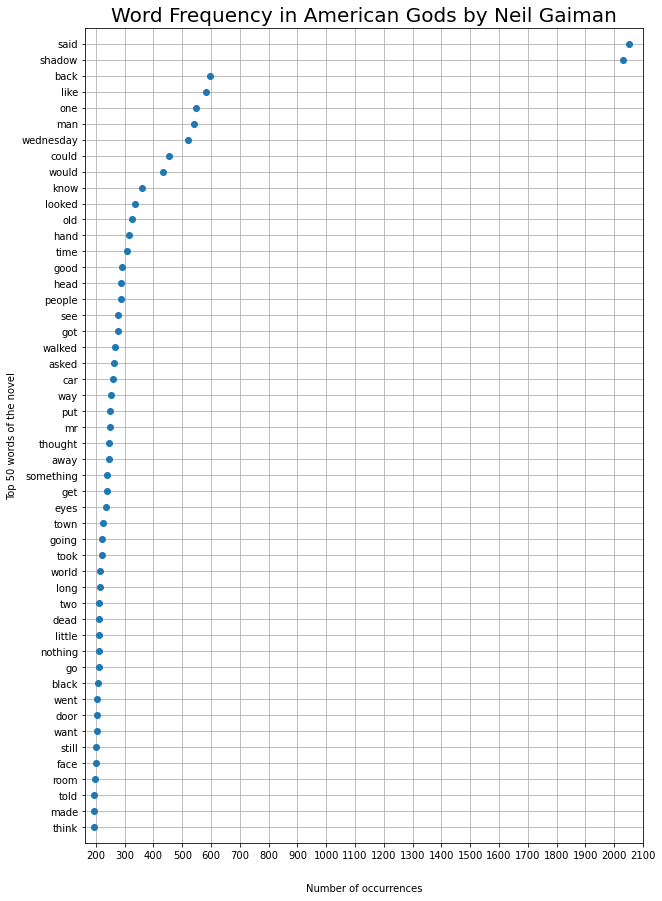

In [10]:
plt.rcParams.update({'font.size': 10,
                     'font.family': 'sans serif',
                     'axes.titlesize': 20})

# Create a figure containing one subplot
fig, ax = plt.subplots(figsize=(10,15))

# Creat the plot passing the values along with the keys
_ = ax.plot(count_dict.values(), count_dict.keys(), 'o')

# Set x-limit to start at almost the lower bound and end at almost the upper bound
_ = ax.set_xlim(left=lower_bound-30, right=upper_bound+30)

# Set y-limit to enhance display
_ = ax.set_ylim(-1, 50)

# Show grid
_ = ax.grid(True)

# Set the xticks range
_ = ax.set_xticks(range(200,2110,100))

# Set title
_ = ax.set_title("Word Frequency in American Gods by Neil Gaiman")

# Set ytitle
_ = ax.set_ylabel("Top 50 words of the novel")

# Set xtitle
_ = ax.set_xlabel("Number of occurrences")
ax.xaxis.set_label_coords(0.5, -0.05)